###LAB4 MỘT SỐ THUẬT TOÁN CƠ BẢN CỦA HỌC MÁY

## 1. Linear regression

In [ ]:
## bài 1 sử dụng hồi quy tuyến tính đẻ dự đoán giá nhà thông qua bộ dữ liệu fetch-califonia


In [ ]:
!pip install scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
cali = fetch_california_housing()
X = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.Series(cali.target)

In [ ]:
## chia tập dữ liệu có 80% huấn luyện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## xây dựng và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
## dự đoán và đánh giá
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

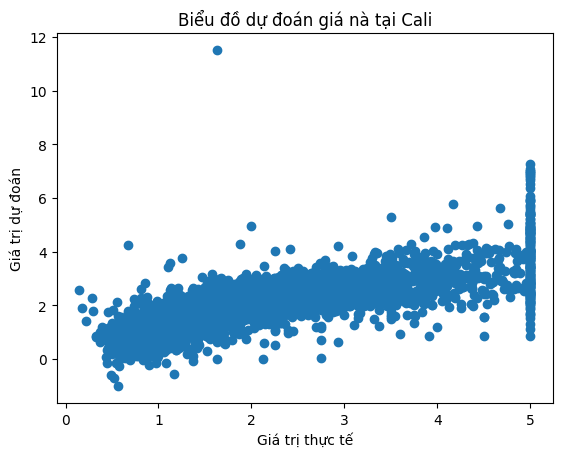

In [ ]:
## Vẽ biểu đồ
plt.scatter(y_test, y_pred)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Biểu đồ dự đoán giá nà tại Cali')
plt.show()


### Bài 2 Test Zalo

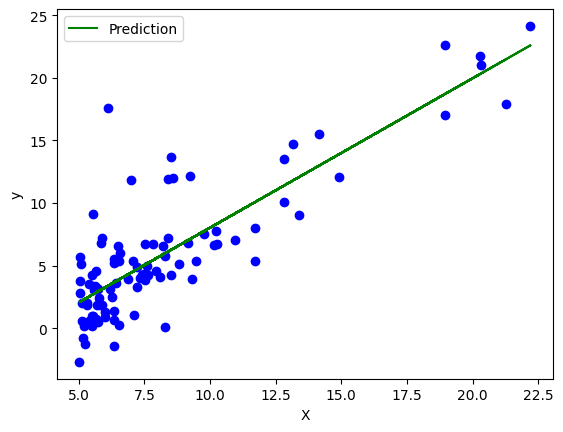

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Bước 1: Đọc dữ liệu từ file
file_path = '/content/lab1data1.txt'
df = pd.read_csv(file_path, names=['X', 'y'])

# Bước 2: Chia dữ liệu thành X và y
X = df[['X']]
y = df['y']

# Bước 3: Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Bước 4: Dự đoán giá trị
y_pred = model.predict(X)

# Vẽ biểu đồ trực quan hóa kết quả
plt.scatter(X, y, color='blue')  # Dữ liệu thực tế
plt.plot(X, y_pred, color='green', label='Prediction')  # Đường hồi quy
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Hồi quy logistic

In [15]:
## xây dựng mô hình logistic để phân loại trong dữ liệu breast cancer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [5]:
## load data
data = load_breast_cancer()
X = data.data
y = data.target

In [6]:
## chia tệp dữ liệu thành tệp huấn luyện 80% và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Xây dựng và huấn luyện mô hình
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [13]:
## dự đoán và đánh giá
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.4f}")
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))

Độ chính xác của mô hình: 0.9561
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



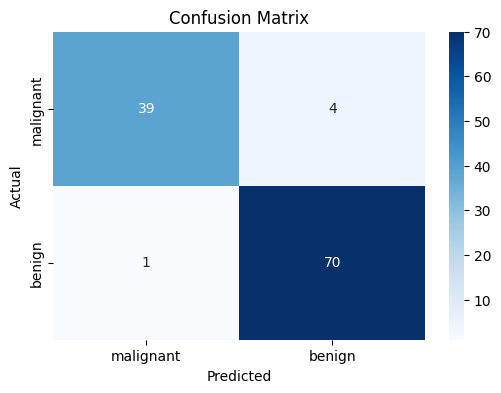

In [16]:
## trực quan hóa dữ liệu
# Vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




In [ ]:
## phân cụm

## nhóm các đối tượng và đặc điểm tương đồng mà không cần gắn nhãn

In [17]:
# Sử dụng data Iris để phân cụm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [19]:
# Áp dụng KMeans với số cụm là 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.labels_

In [20]:
# Sử dụng PCA để giảm chiều xuống 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

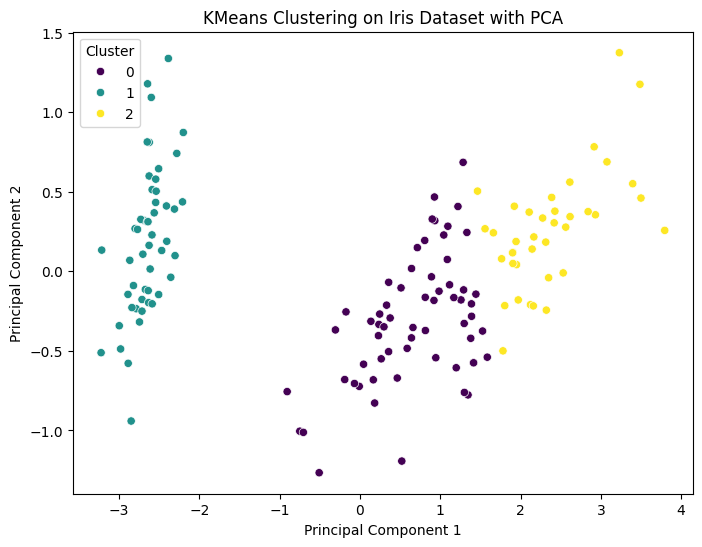

In [21]:
# Trực quan hóa kết quả
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering on Iris Dataset with PCA')
plt.legend(title='Cluster')
plt.show()

Giải thích về PCA để giảm chiều dữ liệu

1. PCA là gì?

PCA (Principal Component Analysis - Phân tích thành phần chính) là một phương pháp giảm chiều dữ liệu, giúp trích xuất các đặc trưng quan trọng nhất từ tập dữ liệu nhiều chiều. PCA hoạt động bằng cách tìm ra các trục chính (principal components) sao cho dữ liệu có thể được biểu diễn một cách tối ưu với ít chiều hơn mà vẫn giữ được nhiều thông tin nhất có thể.

2. Tại sao cần giảm chiều?
	•	Tăng tốc độ tính toán: Dữ liệu có số chiều lớn (high-dimensional) thường làm chậm các mô hình máy học.
	•	Tránh hiện tượng quá khớp (overfitting): Quá nhiều đặc trưng có thể gây nhiễu, làm cho mô hình học được cả những thông tin không quan trọng.
	•	Dễ dàng trực quan hóa: Dữ liệu có nhiều chiều (>3) rất khó để trực quan hóa, PCA giúp giảm xuống 2D hoặc 3D để dễ phân tích hơn.

3. PCA hoạt động như thế nào?

PCA thực hiện các bước sau:
	1.	Chuẩn hóa dữ liệu: Đưa các đặc trưng về cùng một đơn vị đo bằng cách sử dụng StandardScaler.
	2.	Tính ma trận hiệp phương sai (Covariance Matrix): Để xác định mối quan hệ giữa các đặc trưng.
	3.	Tính toán vector riêng và giá trị riêng (Eigenvectors & Eigenvalues): Xác định các trục chính của dữ liệu.
	4.	Chọn số lượng thành phần chính (Principal Components): Lựa chọn các trục chính giữ lại phần lớn phương sai của dữ liệu.
	5.	Chuyển đổi dữ liệu: Biểu diễn dữ liệu trên các thành phần chính đã chọn.

4. Áp dụng PCA trong bài toán KMeans
	•	Trước khi sử dụng KMeans, tập dữ liệu Iris có 4 chiều (4 features).
	•	Sử dụng PCA để giảm xuống 2 chiều, giúp chúng ta dễ dàng trực quan hóa các cụm.
	•	Sau khi giảm chiều, KMeans vẫn có thể phân cụm hiệu quả vì dữ liệu đã được biểu diễn trên 2 trục chính quan trọng nhất.

5. Kết quả

Sau khi áp dụng PCA, dữ liệu được biểu diễn trong không gian 2D, các cụm KMeans có thể được quan sát trực quan trên biểu đồ scatter.

### Bài 3 Bài tập về nhà

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Đọc dữ liệu từ file CSV
data_path = "/content/sample_data/framingham.csv"
df = pd.read_csv(data_path)


In [27]:
# Loại bỏ các giá trị bị thiếu
df.dropna(inplace=True)


In [28]:
# Tách features và target
X = df.drop(columns=['TenYearCHD'])  # Giả sử 'TenYearCHD' là nhãn bệnh tim
y = df['TenYearCHD']

In [29]:
# Chia dữ liệu thành tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Khởi tạo và huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [32]:
# Dự đoán trên tập test
y_pred = model.predict(X_test)

In [33]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.4f}")
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))

Độ chính xác của mô hình: 0.8607
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       620
           1       0.73      0.14      0.24       112

    accuracy                           0.86       732
   macro avg       0.80      0.57      0.58       732
weighted avg       0.84      0.86      0.82       732



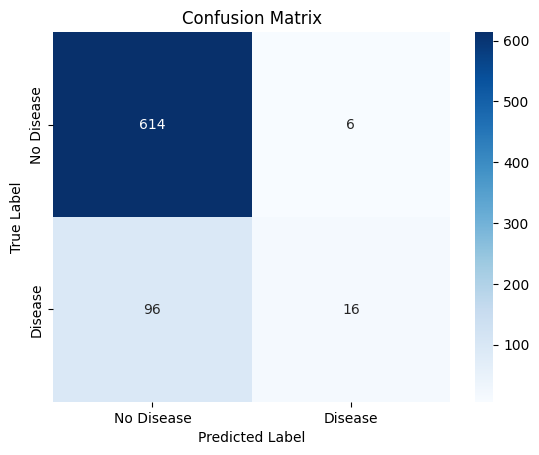

In [34]:
# Trực quan hóa ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()